<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab%202%20-%20Credit%20Scoring%20Modeling%20dengan%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

In [79]:
# Memperbarui Library
!pip install scikit-learn --upgrade

import sklearn as skl
print(skl. __version__) 

# Lalu restart ulang runtime nya

1.0.1


# Membaca Data

## 2.3.2.1 Persiapan data dan impor ke Python

Impor data yang akan digunakan untuk membuat model

In [80]:
# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

## # 2.3.2.3 Struktur data

In [81]:
# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,elektronik,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,Kolek 1,859684.752267,0.000000e+00,305,192,Android,6,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,1,peralatan_rumahtangga,2000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,Kolek 3,743722.804144,1.301412e+06,252,86,IOS,9,3_Lebih_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,3,makanan,1000000,3_wiraswasta,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,Kolek 1,265387.462890,0.000000e+00,858,97,Android,36,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,6,liburan,2000000,1_pegawai_tetap,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,Kolek 3,443234.967513,8.094420e+05,108,159,Android,14,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,4,pendidikan,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,Kolek 2,102046.058576,7.548064e+05,487,63,Android,10,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,5,makanan,500000,3_wiraswasta,5. >20 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,Kolek 3,480608.200003,3.222612e+06,595,200,Android,5,3_Lebih_3_tahun,Social_Media,Telco_A,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,1,liburan,500000,1_pegawai_tetap,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,Kolek 3,133535.433266,4.303138e+05,334,172,Android,37,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,5,buka_bisnis,500000,4_tidak_bekerja,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,Kolek 3,384367.579947,5.326622e+04,107,186,Android,35,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,1,peralatan_rumahtangga,500000,3_wiraswasta,4. 10 - 20 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,Kolek 3,527874.467181,1.954899e+06,45,235,IOS,17,2_1_ke_3_tahun,Social_Media,Telco_A,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,3,liburan,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,Kolek 1,226586.344920,0.000000e+00,254,285,Android,17,2_1_ke_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [82]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       988 non-null    object 
 6   Pendapatan_perbulan             990 non-null    object 
 7   Lama_Bekerja                    973 non-null    object 
 8   Status                          996 non-null    object 
 9   Kepemilikan_Rumah               997 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            999

## # 2.3.2.4 Tipe data

In [83]:
# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

## 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

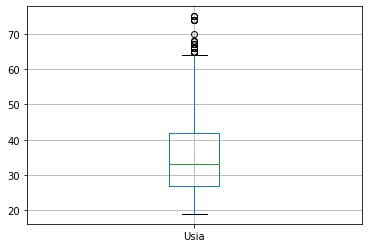

In [84]:
df.boxplot(column=['Usia'])

## Latihan membuat Box Plot

In [85]:
# Latihan untuk boxplot variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



# Missing Data Treatment (Apa yang harus dilakukan terhadap data yang kosong?)

## 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai


In [86]:
# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## # 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)


In [87]:
# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

## 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)


In [88]:
# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

## 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

In [89]:
# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [90]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [91]:
# Menghapus indeks dari data yang telah dibuang
df_clean = df_clean.reset_index(drop=True)

In [92]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
df_clean.info()

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              948 non-null    category
 1   gagal_bayar                     948 non-null    category
 2   Lama_Cicilan                    948 non-null    float64 
 3   Tujuan_Pinjaman                 948 non-null    category
 4   Jumlah_Pinjaman                 948 non-null    float64 
 5   Pekerjaan                       948 non-null    category
 6   Pendapatan_perbulan             948 non-null    category
 7   Lama_Bekerja                    948 non-null    category
 8   Status                          948 non-null    category
 9   Kepemilikan_Rumah               948 non-null    category
 10  Alamat_Rumah                    948 non-null    category
 11  Alamat_Kantor                   948 non-null    category
 12  Usia                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Eksplorasi (Explanatory Data Analysis atau EDA)

## 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

In [94]:
# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    670
1_Gagal    278
Name: gagal_bayar, dtype: int64
0_Bayar    70.675105
1_Gagal    29.324895
Name: gagal_bayar, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas


In [95]:
# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            483
Kolek 1            270
Kolek 2             84
Tidak_Ditemukan     49
Kolek 5             48
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64
Kolek 3            50.949367
Kolek 1            28.481013
Kolek 2             8.860759
Tidak_Ditemukan     5.168776
Kolek 5             5.063291
Kolek 4             1.476793
Name: SLIK_Kolektibilitas, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas


In [96]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  229       41
Kolek 2                   58       26
Kolek 3                  333      150
Kolek 4                    6        8
Kolek 5                   21       27
Tidak_Ditemukan           23       26
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              84.814815  15.185185
Kolek 2              69.047619  30.952381
Kolek 3              68.944099  31.055901
Kolek 4              42.857143  57.142857
Kolek 5              43.750000  56.250000
Tidak_Ditemukan      46.938776  53.061224


## 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

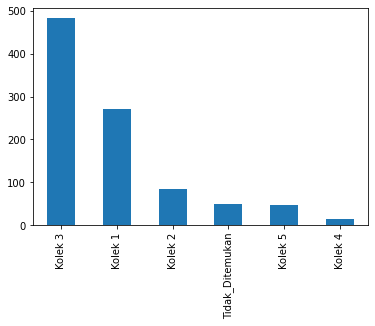

In [97]:
# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

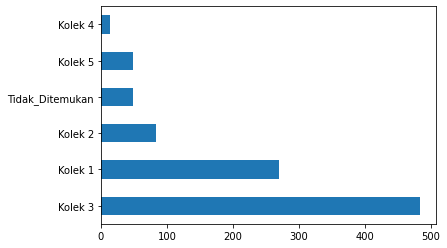

In [98]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

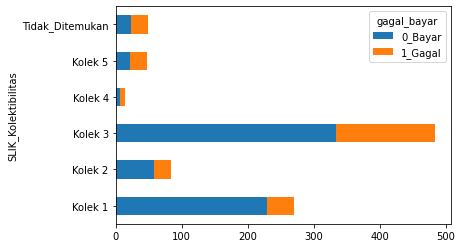

In [99]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

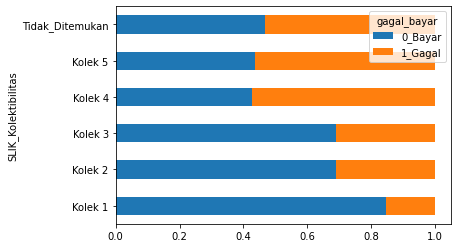

In [100]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

## Latihan EDA untuk variabel kategori

In [101]:
# Latihan EDA untuk Tujuan_Pinjaman, Lama_Bekerja, atau variabel kategori / teks lainnya
# Tulis kode disini



## 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

In [102]:
# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    948.000000
mean      35.548523
std       11.335750
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,670.0,36.116418,11.239140,19.0,27.0,34.0,42.00,75.0
1_Gagal,278.0,34.179856,11.470415,19.0,25.0,31.0,40.75,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

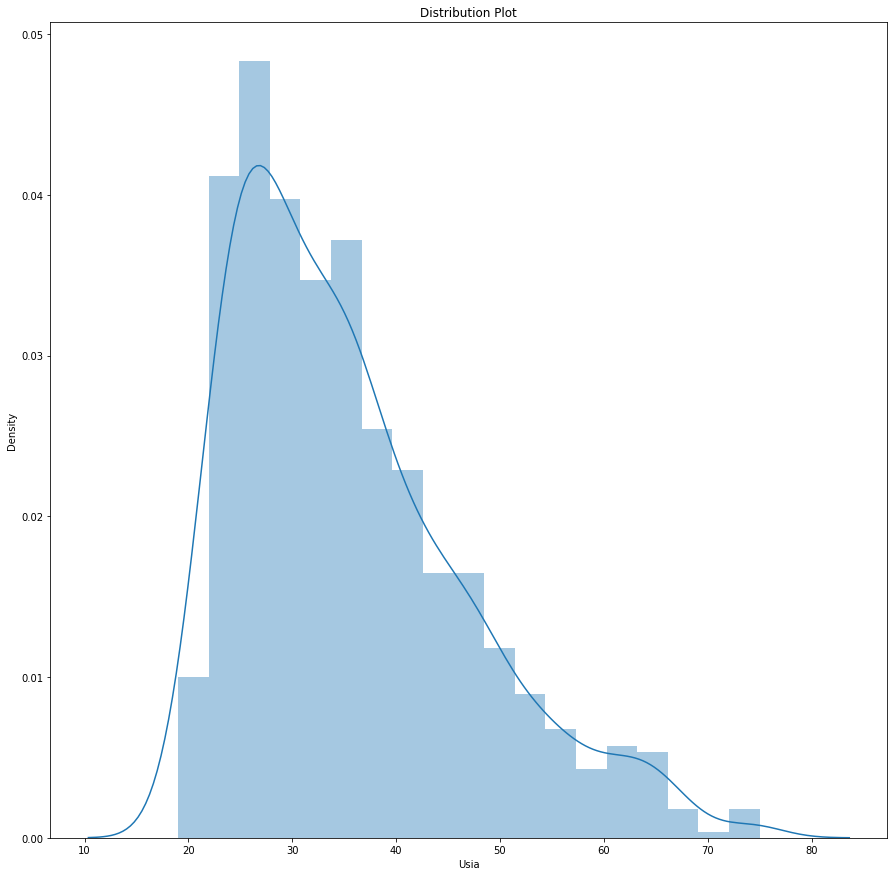

In [103]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


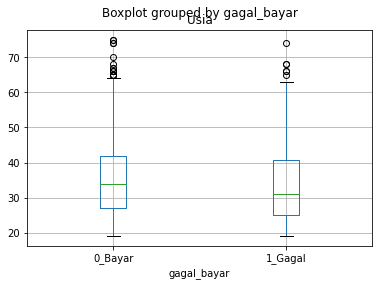

In [104]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

## Latihan EDA untuk variabel Numerik

In [105]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



## Korelasi

In [106]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

In [107]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.0778147171989035


In [108]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.400635164816287, pvalue=0.016558910387081596)

## 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

In [109]:
# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.298788,0.029419,0.000481,0.029004,-0.012322,-0.028463,-0.057698,0.021000
Jumlah_Pinjaman,0.298788,1.000000,0.041210,-0.031538,-0.007841,0.013080,-0.020965,-0.026660,0.132585
Usia,0.029419,0.041210,1.000000,0.007345,-0.008791,0.018705,0.018308,0.032119,-0.077815
SLIK_Cicilan_Bulanan,0.000481,-0.031538,0.007345,1.000000,0.317872,0.034330,-0.056521,-0.003362,0.181373
SLIK_Outstanding_CC,0.029004,-0.007841,-0.008791,0.317872,1.000000,-0.035197,-0.004624,-0.054377,0.185339
API_CreditScore_Vendor_A,-0.012322,0.013080,0.018705,0.034330,-0.035197,1.000000,-0.000716,0.040767,-0.038087
API_CreditScore_Vendor_B,-0.028463,-0.020965,0.018308,-0.056521,-0.004624,-0.000716,1.000000,-0.018533,-0.160338
Device_Apps_Installed,-0.057698,-0.026660,0.032119,-0.003362,-0.054377,0.040767,-0.018533,1.000000,-0.132190
default,0.021000,0.132585,-0.077815,0.181373,0.185339,-0.038087,-0.160338,-0.132190,1.000000


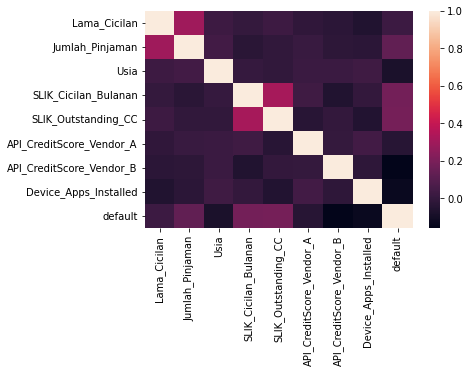

In [110]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Latihan Korelasi

In [111]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [112]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



In [113]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              948 non-null    category
 1   gagal_bayar                     948 non-null    category
 2   Lama_Cicilan                    948 non-null    float64 
 3   Tujuan_Pinjaman                 948 non-null    category
 4   Jumlah_Pinjaman                 948 non-null    float64 
 5   Pekerjaan                       948 non-null    category
 6   Pendapatan_perbulan             948 non-null    category
 7   Lama_Bekerja                    948 non-null    category
 8   Status                          948 non-null    category
 9   Kepemilikan_Rumah               948 non-null    category
 10  Alamat_Rumah                    948 non-null    category
 11  Alamat_Kantor                   948 non-null    category
 12  Usia                  

## 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori


In [114]:
# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_buka_bisnis  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_buka_bisnis                                0.000000e+00  ...                     4.236873e-04
Tujuan_Pinjaman_elektronik                                 3.736414e-22  ...                     8.344980e-04
Tujuan_Pinjaman_liburan                                    1.432841e-05  ...                     7.020366e-02
Tujuan_Pinjaman_makanan                                    1.027722e-06  ...                     2.353050e-01
Tujuan_Pinjaman_pendidikan                                 3.761034e-05  ...                     3.820163e-01
...                                                                 ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun                  5.577441e-01  ...                     1.663092e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun                  1.438647e-01  ...                     2.431699e-01
Mobile_Num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard


In [115]:
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                     0         1       woe        iv
SLIK_Kolektibilitas                                        
Kolek 1              0.341791  0.147482 -0.840493  0.324213
Kolek 2              0.086567  0.093525  0.077310  0.324213
Kolek 3              0.497015  0.539568  0.082149  0.324213
Kolek 4              0.008955  0.028777  1.167339  0.324213
Kolek 5              0.031343  0.097122  1.130971  0.324213
Tidak_Ditemukan      0.034328  0.093525  1.002259  0.324213


In [116]:
# Variabel SLIK_Kolektibilitas

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          'Kolek 1',
          'Kolek 2&3',
          'Kolek 4&5',
          'Kolek Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.8405,
          0.0814,
          1.1392,
          1.0023
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

Kolek 2&3                59.810127
Kolek 1                  28.481013
Kolek 4&5                 6.540084
Kolek Tidak_Ditemukan     5.168776
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
Kolek 1                  0.341791  0.147482 -0.840493  0.324191
Kolek 2&3                0.583582  0.633094  0.081433  0.324191
Kolek 4&5                0.040299  0.125899  1.139168  0.324191
Kolek Tidak_Ditemukan    0.034328  0.093525  1.002259  0.324191


In [117]:
# Variabel Usia

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          '1.<=25',
          '2.26-30',
          '3.31-35',
          '4.36-40',
          '5.41-50',
          '6.>=51'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          0.560023,
          -0.009605,
          -0.227053,
          -0.344119,
          -0.185054,
          -0.049879
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

2.26-30    21.729958
1.<=25     19.303797
3.31-35    17.405063
5.41-50    16.455696
4.36-40    13.924051
6.>=51     11.181435
Name: Usia_Bin, dtype: float64
default     0   1
Usia_Bin         
1.<=25    106  77
2.26-30   146  60
3.31-35   124  41
4.36-40   102  30
5.41-50   116  40
6.>=51     76  30
default          0         1       woe       iv
Usia_Bin                                       
1.<=25    0.158209  0.276978  0.560023  0.09601
2.26-30   0.217910  0.215827 -0.009605  0.09601
3.31-35   0.185075  0.147482 -0.227053  0.09601
4.36-40   0.152239  0.107914 -0.344119  0.09601
5.41-50   0.173134  0.143885 -0.185054  0.09601
6.>=51    0.113433  0.107914 -0.049879  0.09601


## Latihan membuat WOE untuk Tujuan Pinjaman

In [118]:
# Variabel Tujuan_Pinjaman -> Perbaiki WOE dan Bin nya

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          '1.pendidikan',
          '2.buka_bisnis',
          '3.liburan',
          '4.elektronik',
          '5.peralatan_rumahtangga',
          '6.makanan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          -0.8,
          -0.5,
          -0.3,
          0.4,
          0.5,
          0.8
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)


elektronik               43.037975
buka_bisnis              18.670886
makanan                  10.970464
peralatan_rumahtangga    10.864979
liburan                   8.649789
pendidikan                7.805907
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe        iv
Tujuan_Pinjaman                                              
buka_bisnis            0.200000  0.154676 -0.256983  0.068185
elektronik             0.425373  0.442446  0.039352  0.068185
liburan                0.089552  0.079137 -0.123646  0.068185
makanan                0.092537  0.151079  0.490192  0.068185
pendidikan             0.089552  0.050360 -0.575631  0.068185
peralatan_rumahtangga  0.102985  0.122302  0.171911  0.068185
default                    0    1
Tujuan_Pinjaman_Bin              
1.pendidikan              60   14
2.buka_bisnis            134   43
3.liburan                 60   22
4.elektronik             285  123
5.peralatan_rumahtangga   69   34
6.makanan         

## Latihan membuat WOE untuk API_CreditScore_Vendor_A

In [119]:
# Variabel API_CreditScore_Vendor_A

conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          '01.0-250',
          '02.250-750',
          '03.>750'
          ]
df_clean['API_CreditScore_Vendor_A_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_A_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          0.137238,
          -0.026325,
          -0.315583
          ]
df_clean['API_CreditScore_Vendor_A_WOE'] = np.select(conditions, choices)

default                         0    1
API_CreditScore_Vendor_A_Bin          
01.0-250                      208   99
02.250-750                    386  156
03.>750                        76   23
02.250-750    57.172996
01.0-250      32.383966
03.>750       10.443038
Name: API_CreditScore_Vendor_A_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_A_Bin                                        
01.0-250                      0.310448  0.356115  0.137238  0.016349
02.250-750                    0.576119  0.561151 -0.026325  0.016349
03.>750                       0.113433  0.082734 -0.315583  0.016349


In [120]:
# Variabel Lama_Cicilan

# Untuk melihat proporsi (dalam persentase) dari variabel Lama_Cicilan
print(df_clean['Lama_Cicilan'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          '1_bulan',
          '2_bulan',
          '3_bulan',
          '4_bulan',
          '5_bulan',
          '6_bulan'
          ]
df_clean['Lama_Cicilan_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Lama_Cicilan_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          0.261630,
          -0.610435,
          -0.094903,
          -0.564457,
          -0.357106,
          0.348352
          ]
df_clean['Lama_Cicilan_WOE'] = np.select(conditions, choices)

6.0    24.789030
3.0    23.101266
1.0    22.890295
4.0    11.603376
2.0     9.177215
5.0     8.438819
Name: Lama_Cicilan, dtype: float64
default              0         1       woe        iv
Lama_Cicilan                                        
1.0           0.210448  0.273381  0.261630  0.122392
2.0           0.105970  0.057554 -0.610435  0.122392
3.0           0.237313  0.215827 -0.094903  0.122392
4.0           0.132836  0.075540 -0.564457  0.122392
5.0           0.092537  0.064748 -0.357106  0.122392
6.0           0.220896  0.312950  0.348352  0.122392
default             0   1
Lama_Cicilan_Bin         
1_bulan           141  76
2_bulan            71  16
3_bulan           159  60
4_bulan            89  21
5_bulan            62  18
6_bulan           148  87
default                  0         1       woe        iv
Lama_Cicilan_Bin                                        
1_bulan           0.210448  0.273381  0.261630  0.122392
2_bulan           0.105970  0.057554 -0.610435  0.122392
3_b

In [121]:
# Variabel Device_Apps_Segmentation

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Device_Apps_Segmentation'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          'Productivity',
          'Social_Media',
          'Shopping',
          'Games',
          'Online_Lending'
          ]
df_clean['Device_Apps_Segmentation_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          -0.384035,
          -0.044447,
          -0.280831,
          0.141253,
          0.711034
          ]
df_clean['Device_Apps_Segmentation_WOE'] = np.select(conditions, choices)

Social_Media      37.869198
Shopping          20.780591
Games             17.616034
Productivity      12.447257
Online_Lending    11.286920
Name: Device_Apps_Segmentation, dtype: float64
default                          0         1       woe       iv
Device_Apps_Segmentation                                       
Games                     0.168657  0.194245  0.141253  0.10034
Online_Lending            0.086567  0.176259  0.711034  0.10034
Productivity              0.137313  0.093525 -0.384035  0.10034
Shopping                  0.223881  0.169065 -0.280831  0.10034
Social_Media              0.383582  0.366906 -0.044447  0.10034
default                         0    1
Device_Apps_Segmentation_Bin          
Games                         113   54
Online_Lending                 58   49
Productivity                   92   26
Shopping                      150   47
Social_Media                  257  102
default                              0         1       woe       iv
Device_Apps_Segmentation

In [122]:
# Variabel API_CreditScore_Vendor_B

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 225 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 299 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 299 )
             ]

choices = [
          '1.0-100',
          '2.101-175',
          '3.176-225',
          '4.226-299',
          '5.>299'
          ]
df_clean['API_CreditScore_Vendor_B_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_B_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 225 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 299 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 299 )
             ]

choices = [
          0.290050,
          0.218945,
          0.148043,
          0.123331,
          -2.850045
          ]
df_clean['API_CreditScore_Vendor_B_WOE'] = np.select(conditions, choices)

default                         0   1
API_CreditScore_Vendor_B_Bin         
1.0-100                       110  61
2.101-175                     182  94
3.176-225                     106  51
4.226-299                     147  69
5.>299                        125   3
2.101-175    29.113924
4.226-299    22.784810
1.0-100      18.037975
3.176-225    16.561181
5.>299       13.502110
Name: API_CreditScore_Vendor_B_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_B_Bin                                        
1.0-100                       0.164179  0.219424  0.290050  0.538839
2.101-175                     0.271642  0.338129  0.218945  0.538839
3.176-225                     0.158209  0.183453  0.148043  0.538839
4.226-299                     0.219403  0.248201  0.123331  0.538839
5.>299                        0.186567  0.010791 -2.850045  0.538839


In [123]:
# Variabel Mobile_Provider

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Mobile_Provider'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Provider'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Provider'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          'Telco_A',
          'Telco_B',
          'Telco_C',
          'Telco_D',
          'Telco_E'
          ]
df_clean['Mobile_Provider_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          -0.434317,
          -0.059624,
          -0.171553,
          0.389450,
          0.995488
          ]
df_clean['Mobile_Provider_WOE'] = np.select(conditions, choices)

Telco_A    42.827004
Telco_B    16.139241
Telco_C    14.662447
Telco_D    13.607595
Telco_E    12.763713
Name: Mobile_Provider, dtype: float64
default            0   1
Mobile_Provider         
Telco_A          320  86
Telco_B          110  43
Telco_C          103  36
Telco_D           80  49
Telco_E           57  64
default                 0         1       woe        iv
Mobile_Provider                                        
Telco_A          0.477612  0.309353 -0.434317  0.244431
Telco_B          0.164179  0.154676 -0.059624  0.244431
Telco_C          0.153731  0.129496 -0.171553  0.244431
Telco_D          0.119403  0.176259  0.389450  0.244431
Telco_E          0.085075  0.230216  0.995488  0.244431


In [124]:
# Variabel Device_Apps_Installed

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 5 ),
             ( df_clean['Device_Apps_Installed'] <= 10 ),
             ( df_clean['Device_Apps_Installed'] <= 15 ),
             ( df_clean['Device_Apps_Installed'] <= 20 ),
             ( df_clean['Device_Apps_Installed'] <= 30 ),
             ( df_clean['Device_Apps_Installed'] > 30 )
             ]

choices = [
          '1.0-5',
          '2.5-10',
          '3.10-15',
          '4.15-20',
          '5.20-30',
          '6.>30'
          ]
df_clean['Device_Apps_Installed_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Installed_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Device_Apps_Installed_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Installed_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 5 ),
             ( df_clean['Device_Apps_Installed'] <= 10 ),
             ( df_clean['Device_Apps_Installed'] <= 15 ),
             ( df_clean['Device_Apps_Installed'] <= 20 ),
             ( df_clean['Device_Apps_Installed'] <= 30 ),
             ( df_clean['Device_Apps_Installed'] > 30 )
             ]

choices = [
          0.583391,
          0.234828,
          0.195478,
          -0.057468,
          -0.104180,
          -0.781075
          ]
df_clean['Device_Apps_Installed_WOE'] = np.select(conditions, choices)

default                      0   1
Device_Apps_Installed_Bin         
1.0-5                       39  29
2.5-10                     101  53
3.10-15                    111  56
4.15-20                     97  38
5.20-30                    222  83
6.>30                      100  19
5.20-30    32.172996
3.10-15    17.616034
2.5-10     16.244726
4.15-20    14.240506
6.>30      12.552743
1.0-5       7.172996
Name: Device_Apps_Installed_Bin, dtype: float64
default                           0         1       woe        iv
Device_Apps_Installed_Bin                                        
1.0-5                      0.058209  0.104317  0.583391  0.110336
2.5-10                     0.150746  0.190647  0.234828  0.110336
3.10-15                    0.165672  0.201439  0.195478  0.110336
4.15-20                    0.144776  0.136691 -0.057468  0.110336
5.20-30                    0.331343  0.298561 -0.104180  0.110336
6.>30                      0.149254  0.068345 -0.781075  0.110336


In [125]:
# Variabel Device_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Device_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Device_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          '1_Kurang_1_tahun',
          '2_1_ke_3_tahun',
          '3_Lebih_3_tahun'
          ]
df_clean['Device_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          -0.041500,
          -0.124465,
          0.169268
          ]
df_clean['Device_Active_Since_WOE'] = np.select(conditions, choices)


2_1_ke_3_tahun      47.995781
3_Lebih_3_tahun     36.814346
1_Kurang_1_tahun    15.189873
Name: Device_Active_Since, dtype: float64
default                0    1
Device_Active_Since          
1_Kurang_1_tahun     103   41
2_1_ke_3_tahun       333  122
3_Lebih_3_tahun      234  115
default                     0         1       woe        iv
Device_Active_Since                                        
1_Kurang_1_tahun     0.153731  0.147482 -0.041500  0.018402
2_1_ke_3_tahun       0.497015  0.438849 -0.124465  0.018402
3_Lebih_3_tahun      0.349254  0.413669  0.169268  0.018402


In [126]:
# Variabel Mobile_Number_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Mobile_Number_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Number_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Number_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          '1_Kurang_1_bulan',
          '2_Kurang_1_tahun',
          '3_1_ke_2_tahun',
          '4_2_ke_5_tahun',
          '5_Lebih_5_tahun',
          ]
df_clean['Mobile_Number_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          0.407297,
          0.238695,
          -0.074022,
          -0.362057,
          -0.624421
          ]
df_clean['Mobile_Number_Active_Since_WOE'] = np.select(conditions, choices)

1_Kurang_1_bulan    29.113924
5_Lebih_5_tahun     18.565401
4_2_ke_5_tahun      18.354430
2_Kurang_1_tahun    18.037975
3_1_ke_2_tahun      15.928270
Name: Mobile_Number_Active_Since, dtype: float64
default                       0    1
Mobile_Number_Active_Since          
1_Kurang_1_bulan            170  106
2_Kurang_1_tahun            112   59
3_1_ke_2_tahun              109   42
4_2_ke_5_tahun              135   39
5_Lebih_5_tahun             144   32
default                            0         1       woe       iv
Mobile_Number_Active_Since                                       
1_Kurang_1_bulan            0.253731  0.381295  0.407297  0.14806
2_Kurang_1_tahun            0.167164  0.212230  0.238695  0.14806
3_1_ke_2_tahun              0.162687  0.151079 -0.074022  0.14806
4_2_ke_5_tahun              0.201493  0.140288 -0.362057  0.14806
5_Lebih_5_tahun             0.214925  0.115108 -0.624421  0.14806


## 2.3.3.1.1 Variabel Debt Burden Ratio (DBR)

In [127]:
conditions = [
             ( df_clean['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_clean['DBR'] = np.select(conditions, choices)

## 2.3.3.1.2 Apakah alamat kantor dan rumah berdekatan?


In [128]:
conditions = [
             ( df_clean['Alamat_Rumah'] == df_clean['Alamat_Kantor'] ),
             ( df_clean['Alamat_Rumah'] != df_clean['Alamat_Kantor'] ),
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor'] = np.select(conditions, choices)

In [129]:
# Variabel DBR

conditions = [
             ( df_clean['DBR'] <= 0.00 ),
             ( df_clean['DBR'] <= 0.10 ),
             ( df_clean['DBR'] <= 0.20 ),
             ( df_clean['DBR'] <= 0.30 ),
             ( df_clean['DBR'] <= 0.40 ),
             ( df_clean['DBR'] <= 0.50 ),
             ( df_clean['DBR'] <= 0.60 ),
             ( df_clean['DBR'] > 0.60 )
             ]

choices = [
          '1.0%',
          '2.0-10%',
          '3.10-20%',
          '4.20-30%',
          '5.30-40%',
          '6.40-50%',
          '7.50-60%',
          '8.>60%',
          ]
df_clean['DBR_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['DBR_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['DBR_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['DBR_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['DBR'] <= 0.0 ),
             ( df_clean['DBR'] <= 0.1 ),
             ( df_clean['DBR'] <= 0.2 ),
             ( df_clean['DBR'] <= 0.3 ),
             ( df_clean['DBR'] <= 0.4 ),
             ( df_clean['DBR'] <= 0.5 ),
             ( df_clean['DBR'] <= 0.6 ),
             ( df_clean['DBR'] > 0.6 )
             ]

choices = [
          1.145360,
          -0.814122,
          -0.303039,
          -0.036634,
          -0.072352,
          0.062895,
          0.142058,
          0.728616,
          ]
df_clean['DBR_WOE'] = np.select(conditions, choices)

default     0   1
DBR_Bin          
1.0%       23  30
2.0-10%   272  50
3.10-20%   62  19
4.20-30%   60  24
5.30-40%   57  22
6.40-50%   43  19
7.50-60%   46  22
8.>60%    107  92
2.0-10%     33.966245
8.>60%      20.991561
4.20-30%     8.860759
3.10-20%     8.544304
5.30-40%     8.333333
7.50-60%     7.172996
6.40-50%     6.540084
1.0%         5.590717
Name: DBR_Bin, dtype: float64
default          0         1       woe        iv
DBR_Bin                                         
1.0%      0.034328  0.107914  1.145360  0.402759
2.0-10%   0.405970  0.179856 -0.814122  0.402759
3.10-20%  0.092537  0.068345 -0.303039  0.402759
4.20-30%  0.089552  0.086331 -0.036634  0.402759
5.30-40%  0.085075  0.079137 -0.072352  0.402759
6.40-50%  0.064179  0.068345  0.062895  0.402759
7.50-60%  0.068657  0.079137  0.142058  0.402759
8.>60%    0.159701  0.330935  0.728616  0.402759


In [130]:
# Variabel Alamat_Rumah_Kantor

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Alamat_Rumah_Kantor_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          -0.313143,
          0.092824
          ]
df_clean['Alamat_Rumah_Kantor_WOE'] = np.select(conditions, choices)

default                    0    1
Alamat_Rumah_Kantor_Bin          
1.Rumah_Kantor_Dekat     178   54
2.Rumah_Kantor_Jauh      492  224
2.Rumah_Kantor_Jauh     75.527426
1.Rumah_Kantor_Dekat    24.472574
Name: Alamat_Rumah_Kantor_Bin, dtype: float64
default                         0         1       woe        iv
Alamat_Rumah_Kantor_Bin                                        
1.Rumah_Kantor_Dekat     0.265672  0.194245 -0.313143  0.028997
2.Rumah_Kantor_Jauh      0.734328  0.805755  0.092824  0.028997


## Latihan membuat variabel baru usia dan status


In [131]:
# Latihan membuat variabel baru usia dan status
# Koding disini



# Proses Modeling

## Persiapan membuat model: Memilih Variabel Input

In [132]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model

df_model_WOE = df_clean[['default','SLIK_Kolektibilitas_WOE','DBR_WOE','Device_Apps_Segmentation_WOE'
                  ,'Lama_Cicilan_WOE','Usia_WOE','Device_Active_Since_WOE','API_CreditScore_Vendor_B_WOE'
                  ,'Mobile_Provider_WOE','Tujuan_Pinjaman_WOE','Device_Apps_Installed_WOE','Mobile_Number_Active_Since_WOE'
                  ,'Alamat_Rumah_Kantor_WOE'
                  ]]
df_model_Bin = df_clean[['default','SLIK_Kolektibilitas_Bin','DBR_Bin','Device_Apps_Segmentation_Bin'
                  ,'Lama_Cicilan_Bin','Usia_Bin','Device_Active_Since_Bin','API_CreditScore_Vendor_B_Bin'
                  ,'Mobile_Provider_Bin','Tujuan_Pinjaman_Bin','Device_Apps_Installed_Bin','Mobile_Number_Active_Since_Bin'
                  ,'Alamat_Rumah_Kantor_Bin'
                  ]]
df_model = df_clean[['default','SLIK_Kolektibilitas','DBR','Device_Apps_Segmentation'
                  ,'Lama_Cicilan','Usia','Device_Active_Since','API_CreditScore_Vendor_B'
                  ,'Mobile_Provider','Tujuan_Pinjaman','Device_Apps_Installed','Mobile_Number_Active_Since'
                  ,'Alamat_Rumah_Kantor'
                  ]]

In [133]:
# Dalam contoh ini tidak ada oversampling/undersampling

## Membagi dataset menjadi train dan test

In [134]:
# Membagi dataset menjadi development(train) dan test

y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train.to_csv('df_train.csv') 
files.download('df_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modeling dengan logistic regression

In [135]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

[[0.76721243 0.76157741 0.76777736 0.64789686 0.8564418  0.80515421
  0.90746467 0.89557887 0.56667674 1.08676197 0.6237702  1.15609872]]
Optimization terminated successfully.
         Current function value: 0.509299
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.1629
Time:                        01:30:57   Log-Likelihood:                -337.67
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                 8.941e-23
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SLIK_Kolektibilitas_WOE            0.7530      0.175      4.313      0.000       0.411       1.095
DBR_WOE                            0.8843      0.153      5.789      0.000       0.585       1.184
Device_Apps_Segmentation_WOE       0.9218      0.321      2.871      0.004       0.292       1.551
Lama_Cicilan_WOE                   0.8750      0.268      3.269      0.001       0.350       1.400
Usia_WOE                           0.9228      0.311      2.968      0.003       0.313       1.532
Device_Active_Since_WOE            1.2171      0.705      1.726      0.084      -0.165       2.599
API_CreditScore_Vendor_B_WOE       0.7295      0.138      5.280      0.000       0.459       1.000
Mobile_Provider_WOE                0.9288      0.204      4.557      0.000       0.529       1.328
Tujuan_Pinjaman_WOE               -0.0173      0.186     -0.093      0.926      -0.382       0.347
Device_Apps_Installed_WOE          1.0864      0.305      3.564      0.000       0.489       1.684
Mobile_Number_Active_Since_WOE     0.8136      0.250      3.248      0.001       0.323       1.305
Alamat_Rumah_Kantor_WOE            1.5783      0.558      2.831      0.005       0.485       2.671
==================================================================================================
"""

In [136]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
print(test_predict)
# Cara adalah 0 jika bayar, dan 1 jika default

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [137]:
test_pred_proba = lr.predict_proba(X_test)
print(test_pred_proba)
# Cara bacanya adalah 0.635 adalah probabilitas 0 dan 0.364 adaalah probabilitas 1
# Dengan mengacu probabilitas 1 diatas 0.5 maka default / 1

[[0.68713839 0.31286161]
 [0.8294783  0.1705217 ]
 [0.20616922 0.79383078]
 [0.87562786 0.12437214]
 [0.61113193 0.38886807]
 [0.42684064 0.57315936]
 [0.90925436 0.09074564]
 [0.91079822 0.08920178]
 [0.98775303 0.01224697]
 [0.86826162 0.13173838]
 [0.93514794 0.06485206]
 [0.94826211 0.05173789]
 [0.83035239 0.16964761]
 [0.91222627 0.08777373]
 [0.97234472 0.02765528]
 [0.85444122 0.14555878]
 [0.79154783 0.20845217]
 [0.84599806 0.15400194]
 [0.69556829 0.30443171]
 [0.03737556 0.96262444]
 [0.4217949  0.5782051 ]
 [0.75256143 0.24743857]
 [0.12081318 0.87918682]
 [0.80696901 0.19303099]
 [0.88676516 0.11323484]
 [0.96283167 0.03716833]
 [0.86575855 0.13424145]
 [0.70176037 0.29823963]
 [0.9933755  0.0066245 ]
 [0.77286115 0.22713885]
 [0.98631999 0.01368001]
 [0.93350488 0.06649512]
 [0.03843494 0.96156506]
 [0.81171872 0.18828128]
 [0.96493038 0.03506962]
 [0.54702089 0.45297911]
 [0.55967349 0.44032651]
 [0.17135348 0.82864652]
 [0.85110803 0.14889197]
 [0.62141836 0.37858164]


In [138]:
# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, test_predict))
conf_mat = confusion_matrix(y_true=y_test, y_pred=test_predict)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, test_pred_proba[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       204
           1       0.70      0.54      0.61        81

    accuracy                           0.80       285
   macro avg       0.77      0.73      0.74       285
weighted avg       0.79      0.80      0.80       285

Confusion matrix:
 [[185  19]
 [ 37  44]]
ROC Score: 0.8305495037521181


## Modeling logistic regression dengan Stepwise

In [161]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LogisticRegression()
lr.fit(X_train, y_train)

feature_names = np.array(X.columns)

sfs_backward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="backward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise backward: ', feature_names[sfs_backward.get_support()]
)

sfs_forward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="forward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise forward: ', feature_names[sfs_forward.get_support()]
)

Variabel signifikan stepwise backward:  ['SLIK_Kolektibilitas_WOE' 'DBR_WOE' 'Usia_WOE' 'Mobile_Provider_WOE'
 'Device_Apps_Installed_WOE' 'Mobile_Number_Active_Since_WOE']
Variabel signifikan stepwise forward:  ['SLIK_Kolektibilitas_WOE' 'DBR_WOE' 'Usia_WOE'
 'API_CreditScore_Vendor_B_WOE' 'Mobile_Provider_WOE'
 'Tujuan_Pinjaman_WOE']


In [162]:
# Testing hasil stepwise

df_step = df_clean[['SLIK_Kolektibilitas_WOE','DBR_WOE','Usia_WOE','Mobile_Provider_WOE','Device_Apps_Installed_WOE'
                  ,'Mobile_Number_Active_Since_WOE','default'
                  ]]

# Membagi dataset menjadi development(train) dan test

y_step = df_step.loc[:,'default']
X_step = df_step.loc[:,df_step.columns != 'default']

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.30, random_state=42)

lr_step = LogisticRegression()
lr_step.fit(X_train_step, y_train_step)

test_predict_step = lr_step.predict(X_test_step)
test_pred_proba_step = lr_step.predict_proba(X_test_step)

# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test_step, test_predict_step))
conf_mat = confusion_matrix(y_true=y_test_step, y_pred=test_predict_step)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test_step, test_pred_proba_step[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       204
           1       0.68      0.44      0.54        81

    accuracy                           0.78       285
   macro avg       0.74      0.68      0.70       285
weighted avg       0.77      0.78      0.77       285

Confusion matrix:
 [[187  17]
 [ 45  36]]
ROC Score: 0.7801682401355604


## Membuat Scoring dari probabilitas

In [156]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

In [157]:
train_pred_proba = lr.predict_proba(X_train)[:,1]
train_log_pred = lr.predict_log_proba(X_train)[:,1]

score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
score_from_log = (P0 - B * np.log(theta0)) - B * train_log_pred

df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_log_pred = pd.DataFrame(train_log_pred, columns=['Logit_Result'])

df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_log_score = pd.DataFrame(score_from_log, columns=['Score_from_log'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_train, df_train_pred_proba, df_train_log_pred, df_train_score, df_train_log_score], axis = 1)

In [158]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_model_result.csv') 
files.download('df_model_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecard dengan Library scorecardpy

## Instalasi library

In [163]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'API_CreditScore_Vendor_B_Bin': <Figure size 432x288 with 2 Axes>,
 'Alamat_Rumah_Kantor_Bin': <Figure size 432x288 with 2 Axes>,
 'DBR_Bin': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since_Bin': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed_Bin': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation_Bin': <Figure size 432x288 with 2 Axes>,
 'Lama_Cicilan_Bin': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since_Bin': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider_Bin': <Figure size 432x288 with 2 Axes>,
 'SLIK_Kolektibilitas_Bin': <Figure size 432x288 with 2 Axes>,
 'Tujuan_Pinjaman_Bin': <Figure size 432x288 with 2 Axes>,
 'Usia_Bin': <Figure size 432x288 with 2 Axes>}

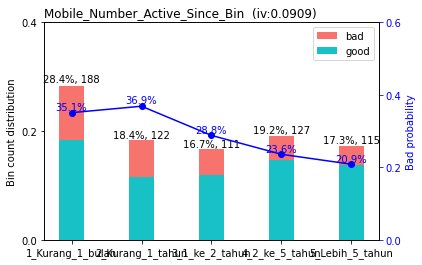

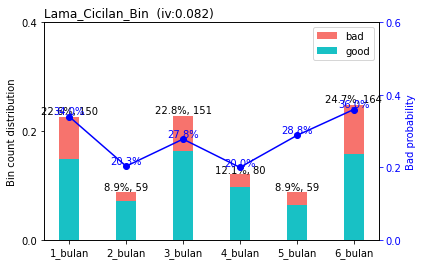

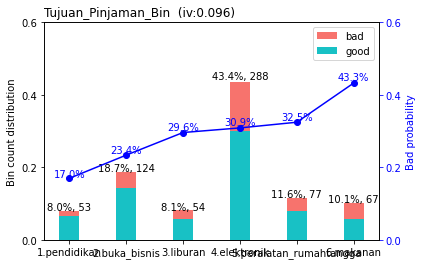

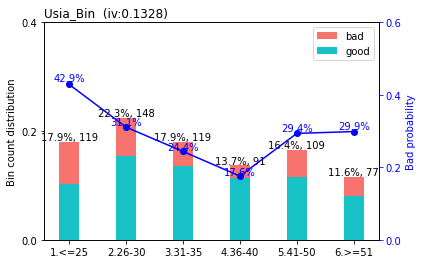

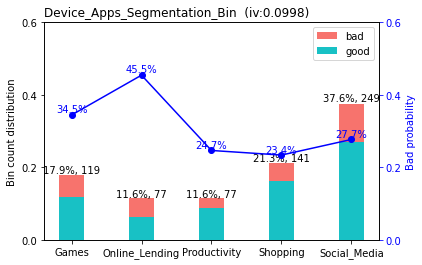

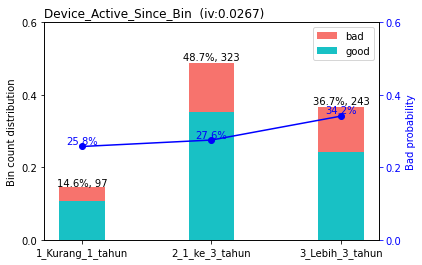

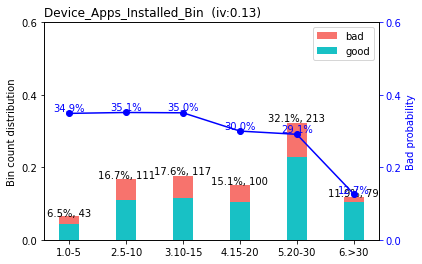

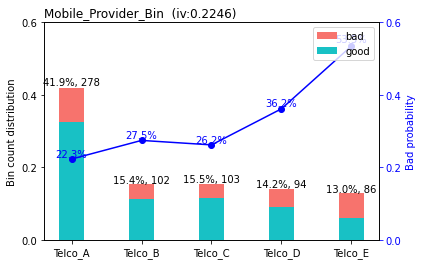

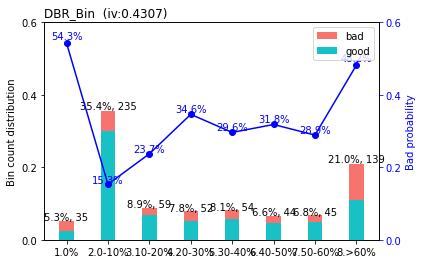

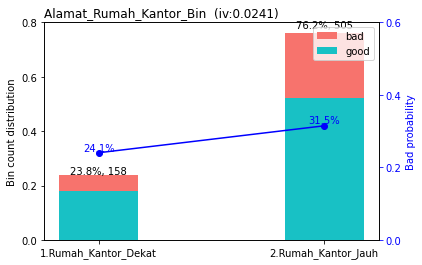

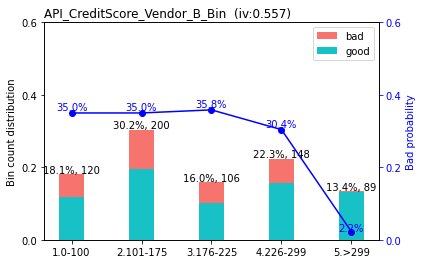

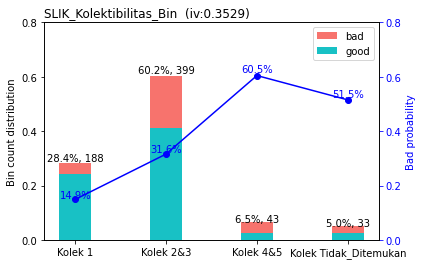

In [164]:
y = df_model_Bin.loc[:,'default']
X = df_model_Bin.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
    'SLIK_Kolektibilitas_Bin': ['Kolek 1','Kolek 2&3','Kolek 4&5','Kolek Tidak_Ditemukan'],
    'DBR_Bin': ["1.0%", "2.0-10%","3.10-20%","4.20-30%","5.30-40%","6.40-50%","7.50-60%","8.>60%"],
    'Device_Apps_Segmentation_Bin': ["Games","Online_Lending","Productivity","Shopping","Social_Media"],
    'Lama_Cicilan_Bin': ["1_bulan", "2_bulan","3_bulan","4_bulan","5_bulan","6_bulan"],
    'Usia_Bin': ["1.<=25","2.26-30","3.31-35","4.36-40","5.41-50","6.>=51"],
    'Device_Active_Since_Bin': ["1_Kurang_1_tahun", "2_1_ke_3_tahun","3_Lebih_3_tahun"],
    'API_CreditScore_Vendor_B_Bin': ["1.0-100", "2.101-175","3.176-225","4.226-299","5.>299"],
    'Mobile_Provider_Bin': ["Telco_A", "Telco_B","Telco_C","Telco_D","Telco_E"],
    'Tujuan_Pinjaman_Bin': ["1.pendidikan", "2.buka_bisnis","3.liburan","4.elektronik","5.peralatan_rumahtangga","6.makanan"],
    'Device_Apps_Installed_Bin': ["1.0-5", "2.5-10","3.10-15","4.15-20","5.20-30","6.>30"],
    'Mobile_Number_Active_Since_Bin': ["1_Kurang_1_bulan", "2_Kurang_1_tahun","3_1_ke_2_tahun","4_2_ke_5_tahun","5_Lebih_5_tahun"],
    'Alamat_Rumah_Kantor_Bin': ["1.Rumah_Kantor_Dekat","2.Rumah_Kantor_Jauh"]
}
bins_adj = scpy.woebin(df_train, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

## Pembuatan WOE secara otomatis

In [165]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
     Mobile_Number_Active_Since_Bin_woe  ...  SLIK_Kolektibilitas_Bin_woe
0                              0.323839  ...                     0.921607
1                              0.246616  ...                     0.087792
2                             -0.471824  ...                     0.087792
3                             -0.312532  ...                    -0.881987
4                             -0.471824  ...                     0.921607
..                                  ...  ...                          ...
658                           -0.312532  ...                     0.087792
659                            0.246616  ...                     0.087792
660                            0.323839  ...                     0.087792
661                            0.246616  ...                     0.087792
662                           -0.042730  ...                     1.285865

[663 rows x 12 columns]
0      0
1 

In [166]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_woe.to_csv('train_woe.csv') 
files.download('train_woe.csv')

X_train.to_csv('X_train_scpy.csv') 
files.download('X_train_scpy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model dengan logistic regression

In [167]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

[[0.80101266 0.64469653 0.92012497 0.74845821 0.73921412 0.82755363
  0.96066739 0.86251623 0.76500151 1.27419674 0.85325215 0.75705663]]
Optimization terminated successfully.
         Current function value: 0.503607
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.1723
Time:                        01:40:58   Log-Likelihood:                -333.89
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                 2.629e-24
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Mobile_Number_Active_Since_Bin_woe     0.9256      0.317      2.920      0.004       0.304       1.547
Lama_Cicilan_Bin_woe                   0.7387      0.330      2.241      0.025       0.093       1.385
Tujuan_Pinjaman_Bin_woe                0.9441      0.319      2.956      0.003       0.318       1.570
Usia_Bin_woe                           0.6985      0.259      2.699      0.007       0.191       1.206
Device_Apps_Segmentation_Bin_woe       0.9590      0.324      2.956      0.003       0.323       1.595
Device_Active_Since_Bin_woe            1.0795      0.589      1.831      0.067      -0.076       2.235
Device_Apps_Installed_Bin_woe          0.9585      0.273      3.516      0.000       0.424       1.493
Mobile_Provider_Bin_woe                0.9429      0.220      4.291      0.000       0.512       1.374
DBR_Bin_woe                            0.7988      0.146      5.463      0.000       0.512       1.085
Alamat_Rumah_Kantor_Bin_woe            1.8446      0.617      2.991      0.003       0.636       3.053
API_CreditScore_Vendor_B_Bin_woe       0.6950      0.133      5.242      0.000       0.435       0.955
SLIK_Kolektibilitas_Bin_woe            0.7854      0.165      4.753      0.000       0.462       1.109
======================================================================================================
"""

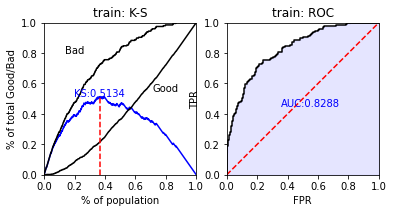

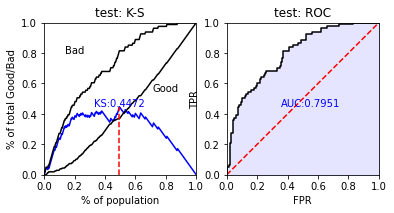

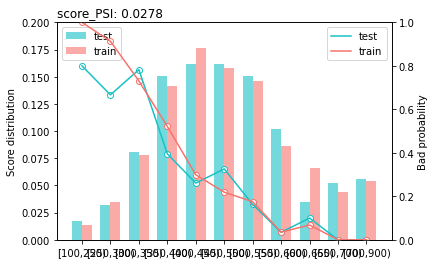

     score
0    369.0
1    433.0
2    489.0
3    436.0
4    301.0
..     ...
658  714.0
659  394.0
660  385.0
661  427.0
662  299.0

[663 rows x 1 columns]


In [168]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

print(train_score)

In [169]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_score.to_csv('train_score.csv') 
files.download('train_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.503607
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Nov 2021   Pseudo R-squ.:                  0.1723
Time:                        01:41:01   Log-Likelihood:                -333.89
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                 2.629e-24
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Mobile_Number_Active_Since_Bin_woe     0.9256      0.317      2.920      0.004       0.304       1.547
Lama_Cicilan_Bin_woe                   0.7387      0.330      2.241      0.025       0.093       1.385
Tujuan_Pinjaman_Bin_woe                0.9441      0.319      2.956      0.003       0.318       1.570
Usia_Bin_woe                           0.6985      0.259      2.699      0.007       0.191       1.206
Device_Apps_Segmentation_Bin_woe       0.9590      0.324      2.956      0.003       0.323       1.595
Device_Active_Since_Bin_woe            1.0795      0.589      1.831      0.067      -0.076       2.235
Device_Apps_Installed_Bin_woe          0.9585      0.273      3.516      0.000       0.424       1.493
Mobile_Provider_Bin_woe                0.9429      0.220      4.291      0.000       0.512       1.374
DBR_Bin_woe                            0.7988      0.146      5.463      0.000       0.512       1.085
Alamat_Rumah_Kantor_Bin_woe            1.8446      0.617      2.991      0.003       0.636       3.053
API_CreditScore_Vendor_B_Bin_woe       0.6950      0.133      5.242      0.000       0.435       0.955
SLIK_Kolektibilitas_Bin_woe            0.7854      0.165      4.753      0.000       0.462       1.109
======================================================================================================
"""

In [171]:
# https://stats.stackexchange.com/questions/10092/what-does-20-ln2-mean-in-logistic-regression

import pandas as pd
import numpy as np

df=pd.DataFrame()

df['fc']=[206, 205, 200, 220, 230, 235, 236, 240,250]
df['cat']=[0, 1, 0, 0, 0, 1, 1, 1,0]
df['good']=[0, 1, 0, 0, 1, 0, 1, 1,1]

train=df[['fc','cat']]
y=df['good']

from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(fit_intercept=True, solver='lbfgs')
clf=clf.fit(train, y)

coefficients = np.append (clf.intercept_, clf.coef_)
print('Coefficients', coefficients)        

#Option 1: Predict proba
test=pd.DataFrame (np.array([200,1]).reshape(1,2))       
y_pred=clf.predict_proba(test)[:,1]
print('Predict proba: ' ,y_pred)

#Option 2: Calculate Probability
ln_odds=sum(np.multiply(coefficients,np.array([1,200,1]))) # sum(coefficients*values)=ln(odds)
odds=np.exp(ln_odds)
prob_good=odds/(1+odds)
print('Resulting probablity: ', prob_good)

#score from Siddiqi
pdo=20
factor=pdo/np.log(2)
offset=200

score1=offset+factor*np.log(1) #p_bad=0.5,   bad=good > odds=1
score2=offset+factor*np.log(2) #p_bad=0,3(3) good=2 bad=1 
score3=offset+factor*np.log(4) #p_bad=0,2    good=4 bad=1 
print(f'Difference 2 and 1: {score2-score1} \nDifference 3 and 2: {score3-score2}'  )

'''To calculate score from logregression '''
#NB! in regression target 1 should be set to good as in Siddiqi odds are 100:1 meaning 100 good and 1 bad 
score=offset-factor*sum(np.multiply(coefficients,np.array([1,200,1])))
print(f'Score from regression:  {round(score,0)}')

#score from probability
score=offset+factor*np.log(prob_good/(1-prob_good))
print(f'Score from probability:  {round(score,0)}')

Coefficients [-15.09769043   0.06773288   0.34779727]
Predict proba:  [0.23088571]
Resulting probablity:  0.23088571052036466
Difference 2 and 1: 20.0 
Difference 3 and 2: 20.0
Score from regression:  235.0
Score from probability:  165.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Scorecard dengan model lain
*   Model selain Logistic Regression
*   



In [151]:
# Persiapan Membuat dataset yang diperlukan sebagai model input 

# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_model.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_model.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_model['default']
dataset_int.drop(['default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

# Cek isi df_encoded
print(df_encoded.head(10))
df_encoded.info()

   SLIK_Kolektibilitas_Kolek 2  ...  default
0                            0  ...        0
1                            0  ...        1
2                            0  ...        0
3                            0  ...        0
4                            1  ...        1
5                            0  ...        0
6                            0  ...        0
7                            0  ...        0
8                            0  ...        0
9                            0  ...        1

[10 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SLIK_Kolektibilitas_Kolek 2                  948 non-null    uint8  
 1   SLIK_Kolektibilitas_Kolek 3                  948 non-null    uint8  
 2   SLIK_Kolektibilitas_Kolek 4                  948 non-null    uint8  
 3   S

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Menggunakan model Random Forest (tanpa scorecard)
*   Menggunakan opsi parameter standar di Random Forest
*   Tidak melakukan resampling

In [152]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'default']
X = df_encoded.loc[:,df_encoded.columns != 'default']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=20)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       204
           1       0.81      0.42      0.55        81

    accuracy                           0.81       285
   macro avg       0.81      0.69      0.71       285
weighted avg       0.81      0.81      0.78       285

Confusion matrix:
 [[196   8]
 [ 47  34]]
ROC Score: 0.7728152989590898


# Menggunakan model Random Forest (dengan scorecard)
*   Menggunakan opsi parameter standar di Random Forest
*   Menggunakan metode bin dan WOE
*   Tidak melakukan resampling

[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


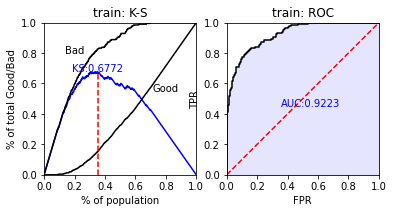

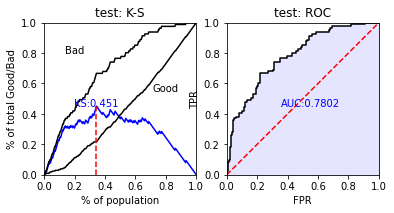

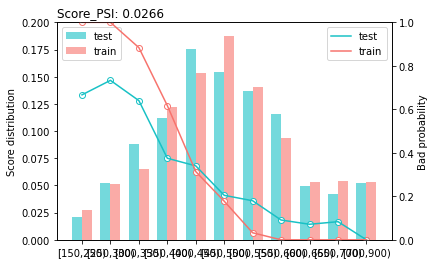

In [153]:
y = df_model_Bin.loc[:,'default']
X = df_model_Bin.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
    'SLIK_Kolektibilitas_Bin': ['Kolek 1','Kolek 2&3','Kolek 4&5','Kolek Tidak_Ditemukan'],
    'DBR_Bin': ["1.0%", "2.0-10%","3.10-20%","4.20-30%","5.30-40%","6.40-50%","7.50-60%","8.>60%"],
    'Device_Apps_Segmentation_Bin': ["Games","Online_Lending","Productivity","Shopping","Social_Media"],
    'Lama_Cicilan_Bin': ["1_bulan", "2_bulan","3_bulan","4_bulan","5_bulan","6_bulan"],
    'Usia_Bin': ["1.<=25","2.26-30","3.31-35","4.36-40","5.41-50","6.>=51"],
    'Device_Active_Since_Bin': ["1_Kurang_1_tahun", "2_1_ke_3_tahun","3_Lebih_3_tahun"],
    'API_CreditScore_Vendor_B_Bin': ["1.0-100", "2.101-175","3.176-225","4.226-299","5.>299"],
    'Mobile_Provider_Bin': ["Telco_A", "Telco_B","Telco_C","Telco_D","Telco_E"],
    'Tujuan_Pinjaman_Bin': ["1.pendidikan", "2.buka_bisnis","3.liburan","4.elektronik","5.peralatan_rumahtangga","6.makanan"],
    'Device_Apps_Installed_Bin': ["1.0-5", "2.5-10","3.10-15","4.15-20","5.20-30","6.>30"],
    'Mobile_Number_Active_Since_Bin': ["1_Kurang_1_bulan", "2_Kurang_1_tahun","3_1_ke_2_tahun","4_2_ke_5_tahun","5_Lebih_5_tahun"],
    'Alamat_Rumah_Kantor_Bin': ["1.Rumah_Kantor_Dekat","2.Rumah_Kantor_Jauh"]
}
bins_adj = scpy.woebin(df_train, y="default", breaks_list=breaks_adj)

train = df_train
test = df_test
# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

# Membuat scorecard dengan menggunakan algoritma xgboost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# predicted probability
# predicted proability
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
# tidak bisa dilakukan karena logic model memperlukan coefficient regresi
#card = scpy.scorecard(bins_adj, xgb_model, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
#train_score = scpy.scorecard_ply(train, card, print_step=0)
#test_score = scpy.scorecard_ply(test, card, print_step=0)

# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

train_score = A - B*np.log(train_pred/(1-train_pred))
test_score = A - B*np.log(test_pred/(1-test_pred))

df_score_train = pd.DataFrame(train_score, columns=['Score'])
df_score_test = pd.DataFrame(test_score, columns=['Score'])

# psi
scpy.perf_psi(
  score = {'train':df_score_train, 'test':df_score_test},
  label = {'train':y_train, 'test':y_test}
)


# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_result_test = pd.concat([df_test, df_score_test], axis = 1)

In [154]:
# Membagi dataset menjadi development(train) dan test
y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Membuat scorecard dengan menggunakan algoritma xgboost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

train_pred_proba_xgb = xgb_model.predict(X_train)

score = A - B*np.log(train_pred_proba_xgb/(1-train_pred_proba_xgb))

df_train_pred_proba_xgb = pd.DataFrame(train_pred_proba_xgb, columns=['train_pred_proba'])
df_train_score_xgb = pd.DataFrame(score, columns=['Score'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result_xgb = pd.concat([df_train, df_train_pred_proba_xgb, df_train_score_xgb], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result_xgb.to_csv('df_model_result_xgb.csv') 
files.download('df_model_result_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>